In [23]:
import tensorflow
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense




In [24]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [26]:
data = pd.read_csv('ETH-USD.csv')

In [29]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Month
2026,2023-05-28,1831.098633,1915.723267,1825.467285,1910.914185,1910.914185,6359610561,5
2027,2023-05-29,1909.297485,1926.421753,1879.077515,1893.078125,1893.078125,5884674572,5
2028,2023-05-30,1893.093140,1916.574951,1883.934692,1901.026611,1901.026611,5363439784,5
2029,2023-05-31,1901.098267,1907.035400,1852.094727,1874.130493,1874.130493,5984512548,5
2030,2023-06-01,1875.778320,1887.705322,1846.472412,1878.897705,1878.897705,5348121088,6


In [28]:
data['Month'] = pd.to_datetime(data['Date']).dt.month

In [30]:
data['Year'] = pd.to_datetime(data['Date']).dt.year
data['day'] = pd.to_datetime(data['Date']).dt.day

In [31]:
px.scatter(data,x=data['Date'],y=data['Close'])

In [32]:
px.scatter(data,x=data['Date'],y=data['Close'],color = 'Year')

In [33]:
x = data[['Open','High','Low','Close']].values
y = data[['Open','High','Low','Close']].values

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=180)

In [36]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(120,activation = 'relu', return_sequences=True, input_shape=(4,1)))
model.add(LSTM(120,activation='relu'))
model.add(Dense(80,activation='linear'))
model.add(Dense(4,activation='linear'))
model.compile(loss='MeanSquaredError', optimizer='adam',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=10, verbose=2)

Epoch 1/10
143/143 - 7s - loss: 227124.1094 - accuracy: 0.7776 - 7s/epoch - 51ms/step
Epoch 2/10
143/143 - 1s - loss: 2425.4658 - accuracy: 0.9303 - 1s/epoch - 8ms/step
Epoch 3/10
143/143 - 1s - loss: 1927.2301 - accuracy: 0.9324 - 992ms/epoch - 7ms/step
Epoch 4/10
143/143 - 1s - loss: 2529.9548 - accuracy: 0.8058 - 1s/epoch - 10ms/step
Epoch 5/10
143/143 - 1s - loss: 2302.2756 - accuracy: 0.7720 - 1s/epoch - 8ms/step
Epoch 6/10
143/143 - 1s - loss: 2573.6011 - accuracy: 0.8100 - 965ms/epoch - 7ms/step
Epoch 7/10
143/143 - 1s - loss: 2610.5481 - accuracy: 0.8508 - 967ms/epoch - 7ms/step
Epoch 8/10
143/143 - 1s - loss: 2493.1785 - accuracy: 0.8459 - 1s/epoch - 7ms/step
Epoch 9/10
143/143 - 1s - loss: 2137.1018 - accuracy: 0.8571 - 1s/epoch - 10ms/step
Epoch 10/10
143/143 - 2s - loss: 2004.2631 - accuracy: 0.8677 - 2s/epoch - 13ms/step


In [37]:
y_pred = model.predict(x_test)

20/20 [==============================] - 0s 5ms/step


In [38]:
y_pred

array([[1597.5732 , 1640.6398 , 1541.8342 , 1575.6038 ],
       [ 169.19415,  173.66574,  163.76476,  167.28258],
       [1811.62   , 1860.7467 , 1748.4989 , 1786.3381 ],
       ...,
       [1908.8087 , 1959.7085 , 1838.4065 , 1876.7367 ],
       [1806.7578 , 1856.2112 , 1745.8107 , 1784.3914 ],
       [ 232.23192,  238.25952,  225.91104,  230.89   ]], dtype=float32)

In [39]:
y_test

array([[1590.481323, 1630.452881, 1555.918945, 1572.714478],
       [ 169.608536,  171.008698,  166.774231,  168.294159],
       [1814.100708, 1830.676025, 1770.231201, 1793.572266],
       ...,
       [1923.86377 , 1930.779785, 1845.119995, 1854.564331],
       [1801.81897 , 1825.859619, 1777.133301, 1805.204956],
       [ 229.762299,  236.394302,  228.426147,  234.416168]])

In [40]:
diff = y_test[:,3:4] - y_pred[:,3:4]

In [41]:
diff

array([[-2.88928177e+00],
       [ 1.01158149e+00],
       [ 7.23413123e+00],
       [ 1.01455698e+00],
       [ 9.46350145e+00],
       [ 2.64875488e+01],
       [ 8.68969766e+00],
       [ 6.91330565e+01],
       [ 6.52590937e+00],
       [ 3.93786606e+00],
       [-7.59272459e+01],
       [ 2.35715329e+01],
       [ 2.30989995e+01],
       [ 2.06506364e+00],
       [ 1.61729737e+01],
       [ 6.44204102e+01],
       [-5.26171856e+00],
       [ 2.66528330e+00],
       [ 1.09606934e+01],
       [ 1.09457359e+00],
       [ 2.59927360e+00],
       [ 9.11130372e+01],
       [ 7.24096641e+00],
       [ 4.34999998e+01],
       [-9.90944823e+01],
       [ 1.72740478e+01],
       [-4.34973099e+00],
       [ 4.89402773e+00],
       [ 8.02441411e+00],
       [ 2.43267871e+00],
       [ 2.44046015e+00],
       [ 5.35092181e+00],
       [ 3.47076424e+00],
       [-1.70113224e+01],
       [ 5.75457762e+00],
       [ 6.53001707e+01],
       [ 6.02587891e+01],
       [ 1.57901033e+00],
       [ 1.0

In [42]:
px.scatter(diff)

In [43]:
y_test_c = y_test[:,3:4]
y_pred_c = y_pred[:,3:4]

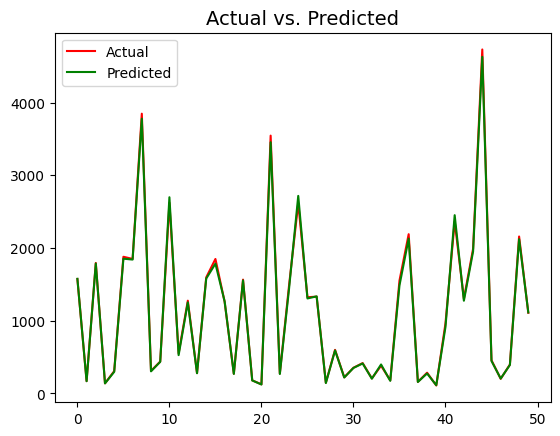

In [44]:
plt.plot(y_test_c[:50],color='red')
plt.plot(y_pred_c[:50],color='green')

plt.title('Actual vs. Predicted', fontsize=14)
plt.legend(['Actual', 'Predicted'])

plt.show()


In [45]:
n = 10
data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,day
2026,2023-05-28,1831.098633,1915.723267,1825.467285,1910.914185,1910.914185,6359610561,5,2023,28
2027,2023-05-29,1909.297485,1926.421753,1879.077515,1893.078125,1893.078125,5884674572,5,2023,29
2028,2023-05-30,1893.093140,1916.574951,1883.934692,1901.026611,1901.026611,5363439784,5,2023,30
2029,2023-05-31,1901.098267,1907.035400,1852.094727,1874.130493,1874.130493,5984512548,5,2023,31
2030,2023-06-01,1875.778320,1887.705322,1846.472412,1878.897705,1878.897705,5348121088,6,2023,1


In [46]:
forecastn = [[[36654.804688,37444.570313,35779.429688,36954.003906]]]

In [47]:
for i in range(1,n+1):
  forecastn.append(model.predict(forecastn[i-1]))

1/1 [==============================] - 0s 39ms/step


In [48]:
forecastn

[[[36654.804688, 37444.570313, 35779.429688, 36954.003906]],
 array([[36806.082, 37812.48 , 35553.99 , 36335.312]], dtype=float32),
 array([[36907.83 , 37902.367, 35590.47 , 36355.79 ]], dtype=float32),
 array([[36989.2  , 37984.145, 35662.066, 36426.45 ]], dtype=float32),
 array([[37068.355, 38065.234, 35737.582, 36503.293]], dtype=float32),
 array([[37147.395, 38146.375, 35813.703, 36581.02 ]], dtype=float32),
 array([[37226.57 , 38227.695, 35890.03 , 36658.965]], dtype=float32),
 array([[37305.934, 38309.176, 35966.527, 36737.11 ]], dtype=float32),
 array([[37385.44 , 38390.824, 36043.19 , 36815.418]], dtype=float32),
 array([[37465.137, 38472.652, 36120.016, 36893.887]], dtype=float32),
 array([[37544.992, 38554.668, 36196.996, 36972.53 ]], dtype=float32)]

In [49]:
forecastn.pop(0)


[[36654.804688, 37444.570313, 35779.429688, 36954.003906]]

In [50]:
forecastn

[array([[36806.082, 37812.48 , 35553.99 , 36335.312]], dtype=float32),
 array([[36907.83 , 37902.367, 35590.47 , 36355.79 ]], dtype=float32),
 array([[36989.2  , 37984.145, 35662.066, 36426.45 ]], dtype=float32),
 array([[37068.355, 38065.234, 35737.582, 36503.293]], dtype=float32),
 array([[37147.395, 38146.375, 35813.703, 36581.02 ]], dtype=float32),
 array([[37226.57 , 38227.695, 35890.03 , 36658.965]], dtype=float32),
 array([[37305.934, 38309.176, 35966.527, 36737.11 ]], dtype=float32),
 array([[37385.44 , 38390.824, 36043.19 , 36815.418]], dtype=float32),
 array([[37465.137, 38472.652, 36120.016, 36893.887]], dtype=float32),
 array([[37544.992, 38554.668, 36196.996, 36972.53 ]], dtype=float32)]

In [51]:
extra = [arr[0][2:3] for arr in forecastn]
extra

[array([35553.99], dtype=float32),
 array([35590.47], dtype=float32),
 array([35662.066], dtype=float32),
 array([35737.582], dtype=float32),
 array([35813.703], dtype=float32),
 array([35890.03], dtype=float32),
 array([35966.527], dtype=float32),
 array([36043.19], dtype=float32),
 array([36120.016], dtype=float32),
 array([36196.996], dtype=float32)]

In [52]:
extra2 = []
for ki in forecastn:
  extra2.append(ki[0][3:])

extra2

[array([36335.312], dtype=float32),
 array([36355.79], dtype=float32),
 array([36426.45], dtype=float32),
 array([36503.293], dtype=float32),
 array([36581.02], dtype=float32),
 array([36658.965], dtype=float32),
 array([36737.11], dtype=float32),
 array([36815.418], dtype=float32),
 array([36893.887], dtype=float32),
 array([36972.53], dtype=float32)]

In [53]:
for i in range(len(extra)):
  extra[i] = list(extra[i])


In [54]:
extra1 = [arr[0] for arr in extra]

In [55]:
extra1

[35553.99,
 35590.47,
 35662.066,
 35737.582,
 35813.703,
 35890.03,
 35966.527,
 36043.19,
 36120.016,
 36196.996]

In [56]:
print(extra1[:])

[35553.99, 35590.47, 35662.066, 35737.582, 35813.703, 35890.03, 35966.527, 36043.19, 36120.016, 36196.996]


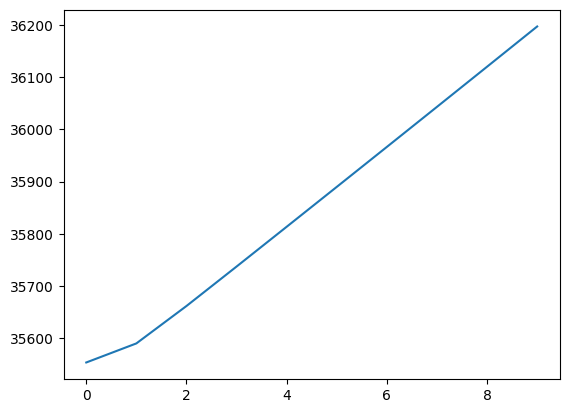

In [57]:
plt.plot(extra1)

In [58]:
rmse=np.sqrt(np.mean(y_test-y_pred)**2)
rmse

0.3591782216812874

In [59]:
_, accuracy = model.evaluate(x,y)

64/64 [==============================] - 1s 7ms/step - loss: 1503.4016 - accuracy: 0.9690
